<a href="https://colab.research.google.com/github/AdityaNerpagar/Pytorch_basics_colab/blob/main/Pytorch_nn_Class_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NN Classification with Pytorch

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
#number of samples
n_samples = 1000
#make samples
X,Y = make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
print(f"first 5 samples of X:\n{X[:5]}")
print(f"first 5 samples of Y:\n{Y[:5]}")

first 5 samples of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of Y:
[1 1 1 1 0]


# Making dataframe


In [ ]:
import pandas as pd

circles = pd.DataFrame({"x1":X[:,0],
                        "x2":X[:,1],
                        "label":Y})
circles.head(10)

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


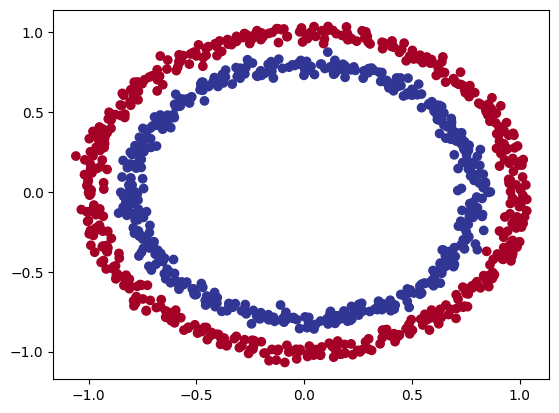

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=Y,
            cmap=plt.cm.RdYlBu);

# Checking input and output shapes

In [ ]:
X.shape,Y.shape


((1000, 2), (1000,))

# change data to tensor and create splits

In [ ]:
import torch

In [ ]:
torch.__version__

'2.0.1+cu118'

In [ ]:
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

In [ ]:
type(X),X.dtype

(torch.Tensor, torch.float32)

In [ ]:
#Split data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,
                                               Y,
                                               test_size=0.2,
                                               random_state=42)

In [ ]:
len(X_train),len(Y_train),len(X_test),len(Y_test)

(800, 800, 200, 200)

# BUILD Model

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [ ]:
# subclass nn.Module
# create linear layer
# define forward method
# instantiate model

class circleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10) #out from 5->10
    self.relu_layer = nn.ReLU()
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1) #Added new layer

    # self.simpleModelV0 = nn.Sequential(
    #     nn.Linear(in_features=2,out_features=5),
    #     nn.Linear(in_features=5,out_features=1)
    # )


  def forward(self,x):
    # return simpleModelV0(x)
    return self.layer_3(self.layer_2(self.layer_1(x))) #leverages speedups wherever possible

modelV1 = circleModelV0().to(device) #important to(device)
modelV1

circleModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
## Another way to create model
simpleModelV0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)   #important .to(device)

simpleModelV0

##we can call this in class too

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
simpleModelV0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6806, -0.3111],
                      [-0.6208, -0.6506],
                      [ 0.0428,  0.6462],
                      [ 0.3436, -0.0480],
                      [-0.2194, -0.4621]], device='cuda:0')),
             ('0.bias',
              tensor([-0.2242, -0.3184,  0.4547,  0.0375, -0.6875], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.4395, -0.2700,  0.3819, -0.3272,  0.2205]], device='cuda:0')),
             ('1.bias', tensor([0.2789], device='cuda:0'))])

In [ ]:
# circleModelV0.state_dict()

# Make predictions

In [ ]:
with torch.inference_mode(): #we can also use with torch.no_grad():
  untrained_preds = simpleModelV0(X_test.to(device)) #important .to(device)
print(f"length of preds:{len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"length of test:{len(X_test)}, Shape: {X_test.shape}")
print(f"first 10 preds:{untrained_preds[:10]}")
print(f"first 10 labels:{Y_test[:10]}")



length of preds:200, Shape: torch.Size([200, 1])
length of test:200, Shape: torch.Size([200, 2])
first 10 preds:tensor([[0.0326],
        [0.0620],
        [0.0544],
        [0.0260],
        [0.2114],
        [0.2281],
        [0.1865],
        [0.2258],
        [0.0477],
        [0.0657]], device='cuda:0')
first 10 labels:tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## Loss an Optimizer

In [ ]:
# setup Loss and Optim
# for regression use MAE or MSE
# For classification use BCE or CCE

loss_fn = nn.BCEWithLogitsLoss() ##gives numeric stability

optimizer = torch.optim.SGD(params=simpleModelV0.parameters(),
                            lr=0.1)

In [ ]:
#Calculate accuracy

def acc_func(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
simpleModelV0.eval()
with torch.inference_mode():
  y_logits = simpleModelV0(X_test.to(device))[:5]
y_logits



tensor([[0.0326],
        [0.0620],
        [0.0544],
        [0.0260],
        [0.2114]], device='cuda:0')

In [ ]:
# use sigmoid
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5081],
        [0.5155],
        [0.5136],
        [0.5065],
        [0.5526]], device='cuda:0')

In [ ]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

In [ ]:
#find pred labels
y_preds = torch.round(y_pred_probs)
#logits->pred probs->pred labels(combined steps)
y_pred_lab = torch.round(torch.sigmoid(simpleModelV0(X_test.to(device)[:5])))
print(torch.eq(y_preds.squeeze(),y_pred_lab.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

## Train Model
### Test#1

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 100
X_train,Y_train = X_train.to(device),Y_train.to(device)
X_test,Y_test = X_test.to(device),Y_test.to(device)
#train loop
for epoch in range(epochs):
  simpleModelV0.train()

  #forward pass
  y_logits = simpleModelV0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #loss
  # loss = loss_fn(torch.sigmoid(y_logits), #loss func for BCE w/o logits-> Expect prob as ip
  #                Y_train)
  loss=loss_fn(y_logits, #loss func for BCE with logits->expect logits as ip
               Y_train)
  acc = acc_func(y_true = Y_train,
                 y_pred=y_pred)

  #optimizers
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### TEST
  simpleModelV0.eval()
  with torch.inference_mode():
    test_logits = simpleModelV0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        Y_test)
    test_acc = acc_func(y_true=Y_test,
                        y_pred=test_pred)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} , Loss: {loss:.5f}, Acc: {acc:.2f}% , Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}% ")


Epoch: 0 , Loss: 0.70796, Acc: 58.63% , Test loss: 0.70870, Test Acc: 54.50% 
Epoch: 10 , Loss: 0.70079, Acc: 52.00% , Test loss: 0.70094, Test Acc: 54.00% 
Epoch: 20 , Loss: 0.69806, Acc: 50.50% , Test loss: 0.69809, Test Acc: 55.50% 
Epoch: 30 , Loss: 0.69671, Acc: 49.62% , Test loss: 0.69689, Test Acc: 53.50% 
Epoch: 40 , Loss: 0.69588, Acc: 49.62% , Test loss: 0.69631, Test Acc: 54.00% 
Epoch: 50 , Loss: 0.69530, Acc: 49.38% , Test loss: 0.69600, Test Acc: 53.50% 
Epoch: 60 , Loss: 0.69486, Acc: 49.75% , Test loss: 0.69582, Test Acc: 53.50% 
Epoch: 70 , Loss: 0.69452, Acc: 49.12% , Test loss: 0.69571, Test Acc: 52.50% 
Epoch: 80 , Loss: 0.69426, Acc: 49.75% , Test loss: 0.69564, Test Acc: 51.00% 
Epoch: 90 , Loss: 0.69404, Acc: 50.25% , Test loss: 0.69559, Test Acc: 51.00% 


# ************Important*********************

In [ ]:
# Make preds and evaluate the model
import requests
from pathlib import Path

#download helper func from pytorch repo
if Path("helper_functions.py").is_file():
  print("Already exists...skipping download")
else:
  print("Downloading")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

Downloading


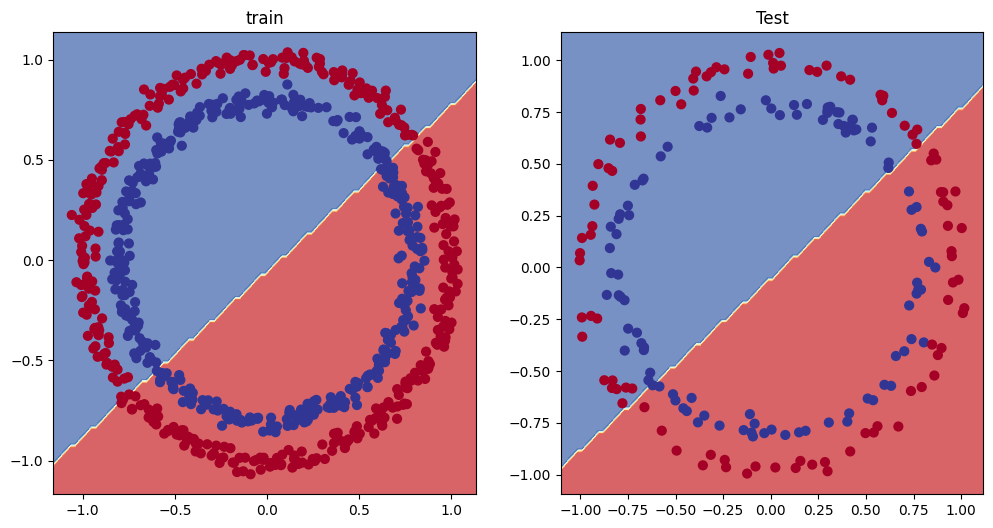

In [ ]:
# For Test#1
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(simpleModelV0,X_train,Y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(simpleModelV0,X_test,Y_test)


## 5. Improving a model (from a model perspective)

| Model improvement technique* | What does it do? |
| ----- | ----- |
| **Add more layers** | Each layer *potentially* increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data, more layers is often referred to as making your neural network *deeper*. |
| **Add more hidden units** | Similar to the above, more hidden units per layer means a *potential* increase in learning capabilities of the model, more hidden units is often referred to as making your neural network *wider*. |
| **Fitting for longer (more epochs)** | Your model might learn more if it had more opportunities to look at the data. |
| **Changing the activation functions** | Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint). |
| **Change the learning rate** | Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough. |
| **Change the loss function** | Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem. |
| **Use transfer learning** | Take a pretrained model from a problem domain similar to yours and adjust it to your own problem.  |

> **Note:** *because you can adjust all of these by hand, they're referred to as **hyperparameters**.

## Train Model
### Test#2

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(modelV1.parameters(), lr=0.1)
epochs = 1000
X_train,Y_train = X_train.to(device),Y_train.to(device)
X_test,Y_test = X_test.to(device),Y_test.to(device)
#train loop
for epoch in range(epochs):
  modelV1.train()

  #forward pass
  y_logits = modelV1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #loss
  # loss = loss_fn(torch.sigmoid(y_logits), #loss func for BCE w/o logits-> Expect prob as ip
  #                Y_train)
  loss=loss_fn(y_logits, #loss func for BCE with logits->expect logits as ip
               Y_train)
  acc = acc_func(y_true = Y_train,
                 y_pred=y_pred)

  #optimizers
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### TEST
  modelV1.eval()
  with torch.inference_mode():
    test_logits = modelV1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        Y_test)
    test_acc = acc_func(y_true=Y_test,
                        y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} , Loss: {loss:.5f}, Acc: {acc:.2f}% , Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}% ")


Epoch: 0 , Loss: 0.69396, Acc: 50.88% , Test loss: 0.69261, Test Acc: 51.00% 
Epoch: 10 , Loss: 0.69369, Acc: 50.25% , Test loss: 0.69270, Test Acc: 50.00% 
Epoch: 20 , Loss: 0.69351, Acc: 50.12% , Test loss: 0.69283, Test Acc: 49.50% 
Epoch: 30 , Loss: 0.69339, Acc: 50.50% , Test loss: 0.69297, Test Acc: 48.00% 
Epoch: 40 , Loss: 0.69329, Acc: 50.38% , Test loss: 0.69310, Test Acc: 49.00% 
Epoch: 50 , Loss: 0.69322, Acc: 49.88% , Test loss: 0.69324, Test Acc: 50.00% 
Epoch: 60 , Loss: 0.69317, Acc: 49.38% , Test loss: 0.69336, Test Acc: 51.50% 
Epoch: 70 , Loss: 0.69312, Acc: 49.38% , Test loss: 0.69348, Test Acc: 50.50% 
Epoch: 80 , Loss: 0.69309, Acc: 50.12% , Test loss: 0.69359, Test Acc: 50.00% 
Epoch: 90 , Loss: 0.69307, Acc: 50.50% , Test loss: 0.69370, Test Acc: 48.50% 
Epoch: 100 , Loss: 0.69305, Acc: 50.38% , Test loss: 0.69379, Test Acc: 48.00% 
Epoch: 110 , Loss: 0.69303, Acc: 50.88% , Test loss: 0.69388, Test Acc: 46.50% 
Epoch: 120 , Loss: 0.69302, Acc: 50.75% , Test loss

## Test #3

In [ ]:
# creat model v2
model_v2 = nn.Sequential(
    nn.Linear(in_features=2,out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10,out_features=20),
    nn.ReLU(),
    nn.Linear(in_features=20,out_features=20),
    nn.ReLU(),
    nn.Linear(in_features=20,out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_v2

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=10, bias=True)
  (7): ReLU()
  (8): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create model V2 with class
from torch import nn
class circleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.Layer_1 = nn.Linear(in_features=2,out_features=5)
    self.relu =nn.ReLU()
    self.Layer_2 =nn.Linear(in_features=5,out_features=20)
    self.Layer_3 =nn.Linear(in_features=20,out_features=10)
    self.Layer_4 =nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.Layer_4(self.relu(self.Layer_3(self.relu(self.Layer_2(self.relu(self.Layer_1(x)))))))

cmodelV2 = circleModelV2().to(device)
cmodelV2

circleModelV2(
  (Layer_1): Linear(in_features=2, out_features=5, bias=True)
  (relu): ReLU()
  (Layer_2): Linear(in_features=5, out_features=20, bias=True)
  (Layer_3): Linear(in_features=20, out_features=10, bias=True)
  (Layer_4): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(cmodelV2.parameters(), lr=0.1)

epochs = 1000
X_train,Y_train = X_train.to(device),Y_train.to(device)
X_test,Y_test = X_test.to(device),Y_test.to(device)
#train loop
for epoch in range(epochs):
  cmodelV2.train()

  #forward pass
  y_logits = cmodelV2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #loss
  # loss = loss_fn(torch.sigmoid(y_logits), #loss func for BCE w/o logits-> Expect prob as ip
  #                Y_train)
  loss=loss_fn(y_logits, #loss func for BCE with logits->expect logits as ip
               Y_train)
  acc = acc_func(y_true = Y_train,
                 y_pred=y_pred)

  #optimizers
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### TEST
  cmodelV2.eval()
  with torch.inference_mode():
    test_logits = cmodelV2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        Y_test)
    test_acc = acc_func(y_true=Y_test,
                        y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} , Loss: {loss:.5f}, Acc: {acc:.2f}% , Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}% ")


Epoch: 0 , Loss: 0.69139, Acc: 50.00% , Test loss: 0.69213, Test Acc: 50.00% 
Epoch: 100 , Loss: 0.68889, Acc: 64.25% , Test loss: 0.68977, Test Acc: 62.00% 
Epoch: 200 , Loss: 0.68676, Acc: 58.00% , Test loss: 0.68791, Test Acc: 58.50% 
Epoch: 300 , Loss: 0.68272, Acc: 62.50% , Test loss: 0.68462, Test Acc: 59.00% 
Epoch: 400 , Loss: 0.67555, Acc: 63.25% , Test loss: 0.67897, Test Acc: 59.50% 
Epoch: 500 , Loss: 0.65994, Acc: 62.62% , Test loss: 0.66625, Test Acc: 58.50% 
Epoch: 600 , Loss: 0.61448, Acc: 88.75% , Test loss: 0.62552, Test Acc: 85.00% 
Epoch: 700 , Loss: 0.45252, Acc: 98.00% , Test loss: 0.47936, Test Acc: 96.50% 
Epoch: 800 , Loss: 0.53309, Acc: 62.75% , Test loss: 0.65589, Test Acc: 56.50% 
Epoch: 900 , Loss: 0.07479, Acc: 100.00% , Test loss: 0.10344, Test Acc: 99.50% 


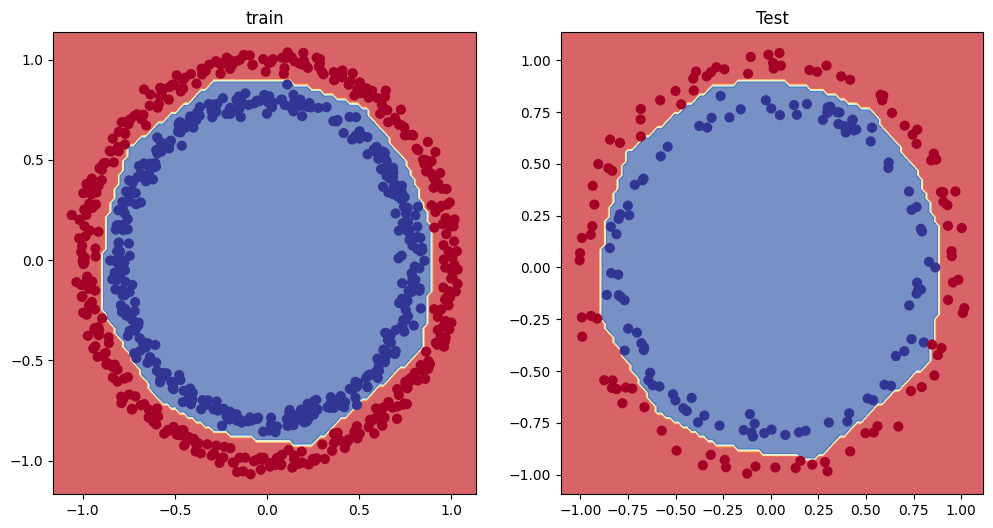

In [ ]:
# For Test#1
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(cmodelV2,X_train,Y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(cmodelV2,X_test,Y_test)


In [ ]:
# for Model_v2(seq)


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_v2.parameters(), lr=0.1)

epochs = 1000
X_train,Y_train = X_train.to(device),Y_train.to(device)
X_test,Y_test = X_test.to(device),Y_test.to(device)
#train loop
for epoch in range(epochs):
  model_v2.train()

  #forward pass
  y_logits = model_v2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #loss
  # loss = loss_fn(torch.sigmoid(y_logits), #loss func for BCE w/o logits-> Expect prob as ip
  #                Y_train)
  loss=loss_fn(y_logits, #loss func for BCE with logits->expect logits as ip
               Y_train)
  acc = acc_func(y_true = Y_train,
                 y_pred=y_pred)

  #optimizers
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### TEST
  model_v2.eval()
  with torch.inference_mode():
    test_logits = model_v2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        Y_test)
    test_acc = acc_func(y_true=Y_test,
                        y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} , Loss: {loss:.5f}, Acc: {acc:.2f}% , Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}% ")


Epoch: 0 , Loss: 0.68539, Acc: 56.38% , Test loss: 0.68474, Test Acc: 54.00% 
Epoch: 100 , Loss: 0.68076, Acc: 56.50% , Test loss: 0.67991, Test Acc: 55.50% 
Epoch: 200 , Loss: 0.67172, Acc: 58.38% , Test loss: 0.67095, Test Acc: 57.50% 
Epoch: 300 , Loss: 0.65069, Acc: 68.25% , Test loss: 0.65036, Test Acc: 65.00% 
Epoch: 400 , Loss: 0.59024, Acc: 81.75% , Test loss: 0.58493, Test Acc: 83.00% 
Epoch: 500 , Loss: 0.52505, Acc: 65.50% , Test loss: 0.51376, Test Acc: 69.50% 
Epoch: 600 , Loss: 0.40254, Acc: 73.75% , Test loss: 0.52542, Test Acc: 64.50% 
Epoch: 700 , Loss: 0.09182, Acc: 99.88% , Test loss: 0.12016, Test Acc: 99.00% 
Epoch: 800 , Loss: 0.02247, Acc: 99.88% , Test loss: 0.03779, Test Acc: 100.00% 
Epoch: 900 , Loss: 0.01199, Acc: 100.00% , Test loss: 0.02338, Test Acc: 100.00% 


In [ ]:
next(model_v2.parameters()).device

device(type='cuda', index=0)

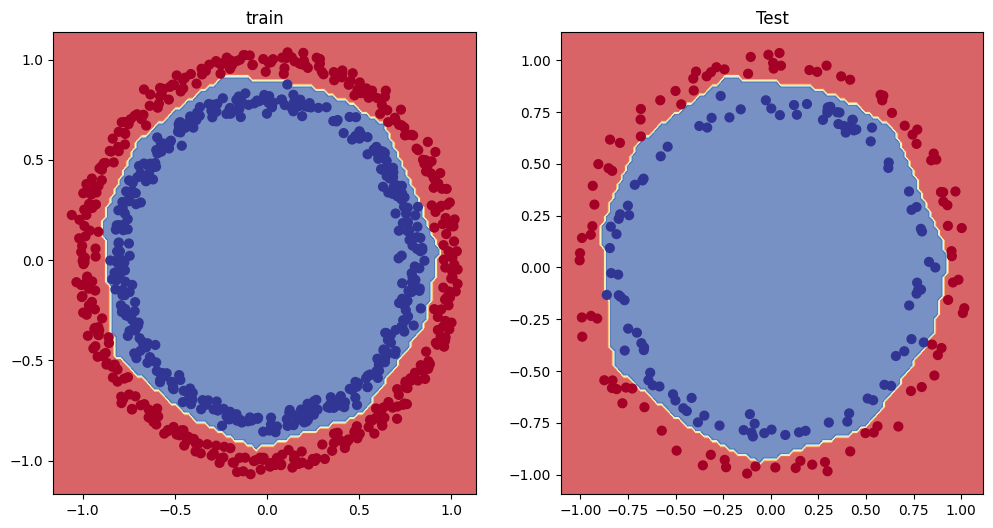

In [ ]:
# For Test#1
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_v2,X_train,Y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_v2,X_test,Y_test)


## To check the device of our model use

```next(model_name.parameters()).device```
 and use
 ```tensor_name.device``` for device of tensor

# Multi-class Classification

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


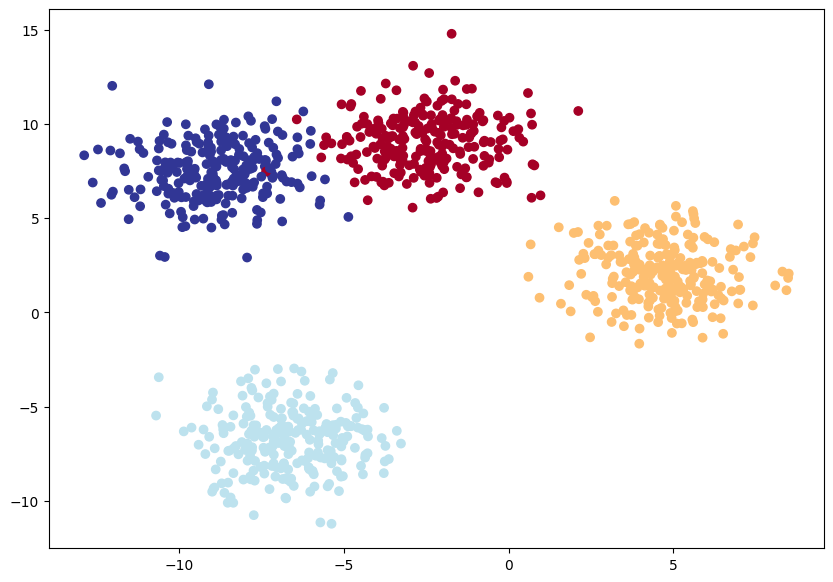

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [ ]:

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
bmodel_0 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
bmodel_0

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
# Fit the model
torch.manual_seed(42)

# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(bmodel_0.parameters(),
                            lr=0.1)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    bmodel_0.train()

    # 1. Forward pass
    y_logits = bmodel_0(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = acc_func(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    bmodel_0.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = bmodel_0(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = acc_func(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


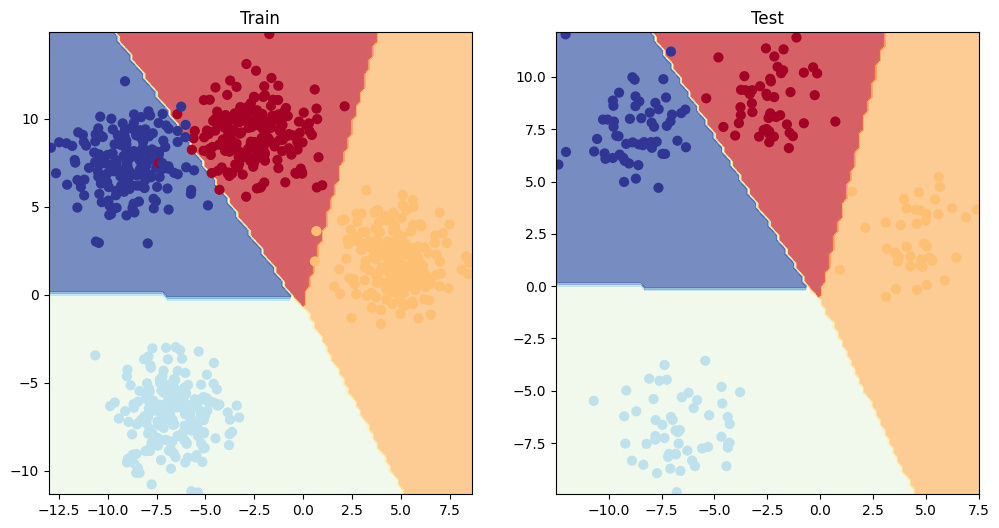

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(bmodel_0, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(bmodel_0, X_blob_test, y_blob_test)